# Network Anomaly Detection Using Machine Learning

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:190%"><b> Table of contents </b></h1>

- [**UNSW-NB15 Dataset**](#1)

     - [**Import and EDA**](#1_1)

     - [**Pre-processing and feature selection**](#1_2)

     - [**Modelling and Evaluation**](#1_3)
        - [**Random Forest**](#1_3_1)
        - [**LSTM (Keras)**](#1_3_2)
        - [**Unsupervised Learning AutoEncoder**](#1_3_3)
        - [**Unsupervised Learning K Means**](#1_3_4)

     - [**Evaluate**](#1_4)
    
- [**USB-IDS-1 Dataset**](#2)

     - [**Import and EDA**](#2_1)

     - [**Pre-processing and feature selection**](#2_2)

     - [**Modelling and Evaluation**](#2_3)
        - [**Random Forest**](#2_3_1)
        - [**LSTM (Keras)**](#2_3_2)
        - [**Unsupervised Learning AutoEncoder**](#2_3_3)
        - [**Unsupervised Learning K Means**](#2_3_4)
     - [**Evaluate**](#2_4)

<a id='1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:100%"> <b>UNSW-NB15 Dataset</b>

<a id='1_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Import and EDA</b>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
import tensorflow as tf


In [14]:
#Import the provided training and test data contaning 170K training records and 70K test records
df_train = pd.read_csv("./datasets/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("./datasets/UNSW_NB15_testing-set.csv")
#Concatenate them so we can do our own ratio and sampling, as well as not do preprocessing twice.
df = pd.concat([df_train, df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [15]:
df.head(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   
5   6  0.380537   tcp       -   FIN     10      6     534     268  39.417980   
6   7  0.637109   tcp       -   FIN     10      8     534     354  26.683033   
7   8  0.521584   tcp       -   FIN     10      8     534     354  32.593026   
8   9  0.542905   tcp       -   FIN     10      8     534     354  31.313031   
9  10  0.258687   tcp       -   FIN     10      6     534     268  57.985135   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   
5  ...                 1              40             0           0   
6  ...                 1              40             0           0   
7  ...                 1              40             0           0   
8  ...                 1              40             0           0   
9  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   
5                 0           2          39                0      Normal   
6                 0           1          39                0      Normal   
7                 0           3          39                0      Normal   
8                 0           3          39                0      Normal   
9                 0           3          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0  

[10 rows x 45 columns]

In [16]:
#Check for duplicates and missing values
print(df.duplicated().sum())
print("***")
print(df.isna().sum())

0
***
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attac

### Data Analysis

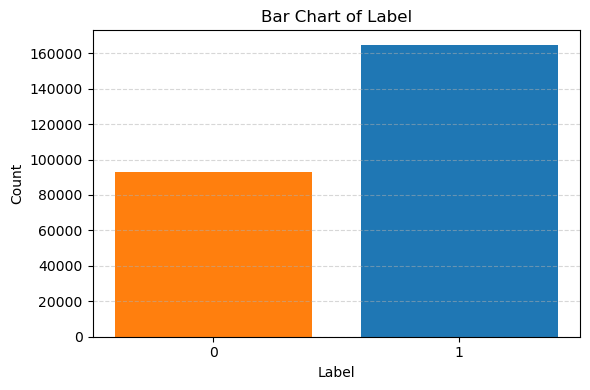

In [52]:
#Normal vs Attack Distribution

label_counts = df['label'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))  
# Create a bar plot
bar_colors = ['#1f77b4', '#ff7f0e']  
ax.bar(label_counts.index, label_counts.values, color=bar_colors)

# Add labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Bar Chart of Label')

# Set the x-axis tick labels to 'normal' and 'attack'
plt.xticks([0, 1])

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)  

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_21508\2931720706.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))


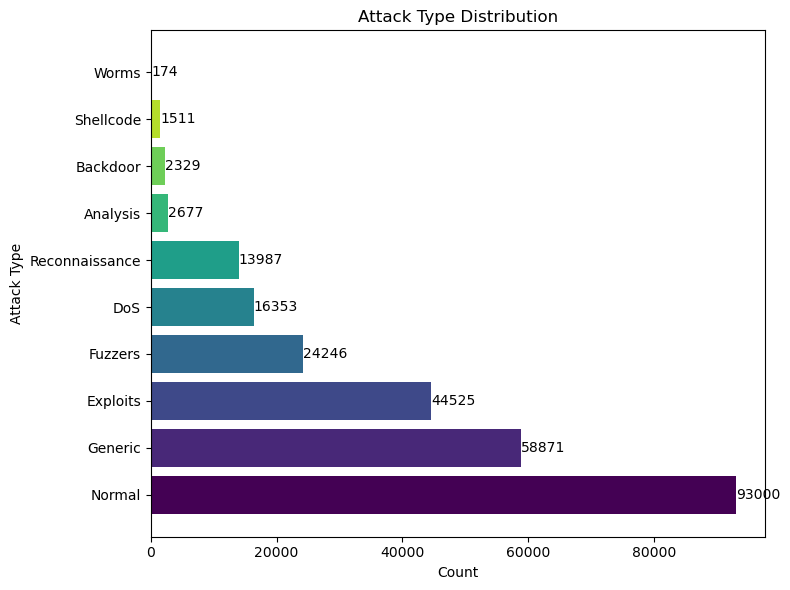

In [53]:
#Distribution of Attacks
attack_counts = df['attack_cat'].value_counts()

# Sort the attack types and counts in descending order
sorted_attack_counts = attack_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))  # Adjust the figsize as desired
# Define a color palette with a gradient effect
colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))

# Create the horizontal bar chart with the customized colors
bars = plt.barh(sorted_attack_counts.index, sorted_attack_counts.values, color=colors(np.arange(len(sorted_attack_counts))))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')

# Invert the y-axis to display the attack types in descending order
plt.gca().invert_yaxis()

# Add count values inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Adjust spacing between bars
plt.tight_layout()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_21508\3573309978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')


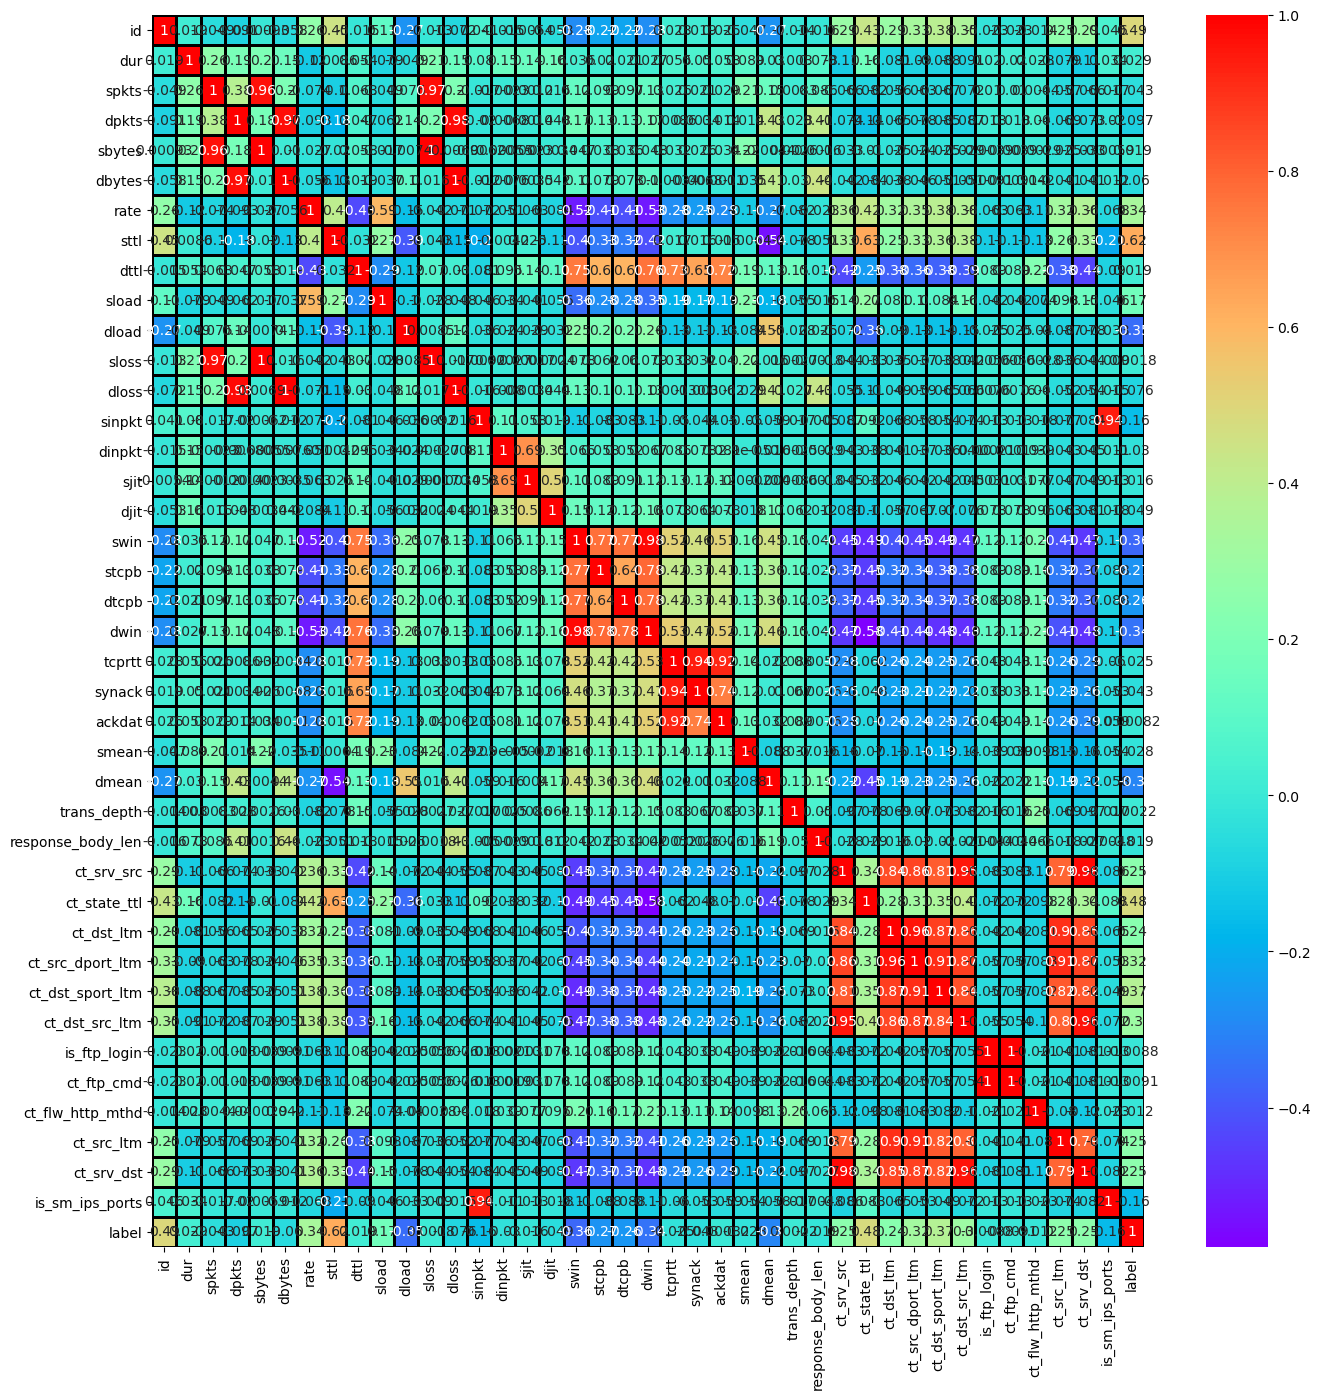

In [54]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')
plt.show()

<a id='1_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Pre-processing and feature selection</b>

Data is clean and free of duplicates as seen from the EDA, however, some columns need to be adjusted for one hot encoding.
**id Column** has nothing to do with target data, so it will be dropped. **Attack category and label** will be dropped and added later due to dimension reduction. <br>
**Data Balancing is needed**

In [17]:
dfu = df.drop(columns=['id', 'attack_cat','label'])

In [18]:
dfu.head(1)

dur proto service state  spkts  dpkts  sbytes  dbytes      rate  sttl  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.08749   252   

   ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  ...           1                 1                 1               1   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0                 0           1           1   

   is_sm_ips_ports  
0                0  

[1 rows x 42 columns]

### Encode categorical features
Column **proto**, **service**, **state** all are categorical and therefore needs to be in numerical for machine learning algorithms.

In [19]:
categorical_cols = dfu.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['proto', 'service', 'state'], dtype='object')


In [20]:
df_encoded = pd.get_dummies(dfu, columns=categorical_cols, drop_first=True)

In [21]:
df_encoded.head(1)

dur  spkts  dpkts  sbytes  dbytes      rate  sttl  dttl        sload  \
0  0.121478      6      4     258     172  74.08749   252   254  14158.94238   

         dload  ...  state_CLO  state_CON  state_ECO  state_FIN  state_INT  \
0  8495.365234  ...      False      False      False       True      False   

   state_PAR  state_REQ  state_RST  state_URN  state_no  
0      False      False      False      False     False  

[1 rows x 193 columns]

### Scaling / Normalization
Min max scaling was used to bring all features to the same scale

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)



### Training and Test split
**Also Add attack category Label for prediction** <br>
**Add training set with synthetic samples using ADASYN for minority samples**

In [11]:
from collections import Counter

from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Assuming df_scaled is your scaled feature set and df['attack_cat'] is the target
X = df_scaled
y = df['attack_cat']

# Split the data into 0.7 training and 0.3 testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the ADASYN object
#adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training data
#X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Reset the indices of X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Separate 'Normal', 'Generic', 'Exploits' and other classes
mask = (y_train == 'Normal') | (y_train == 'Generic') | (y_train == 'Exploits')
X_normal = X_train[mask]
y_normal = y_train[mask]

X_other = X_train[~mask]
y_other = y_train[~mask]


adasyn = ADASYN(random_state=42, sampling_strategy='auto')
X_other_resampled, y_other_resampled = adasyn.fit_resample(X_other, y_other)

# Combine the datasets
X_train_resampled = pd.concat([X_normal, X_other_resampled], ignore_index=True)
y_train_resampled = pd.concat([y_normal, y_other_resampled], ignore_index=True)


In [12]:
# Convert the resampled target array to a pandas Series
y_train_resampled_series = pd.Series(y_train_resampled)

# Get the count of each category
attack_distribution = y_train_resampled_series.value_counts()

# Print the distribution
print(attack_distribution)

attack_cat
Normal            65059
Generic           41403
Exploits          31025
DoS               18280
Analysis          17559
Shellcode         17115
Worms             17058
Fuzzers           17038
Backdoor          16991
Reconnaissance    15415
Name: count, dtype: int64


### PCA Dimension Reduction

In [74]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=50)  # or another appropriate number of components

# Fit PCA on the training data
pca.fit(X_train)

# Transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Do the same for the resampled data
pca_resampled = PCA(n_components=50)
pca_resampled.fit(X_train_resampled)
X_train_pca_resampled = pca.transform(X_train_resampled)
X_test_pca_resampled = pca.transform(X_test)


### Autoencoder Dimension Reduction

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the size of the input features and the encoding dimension
input_dim = X_train.shape[1]
encoding_dim = 50  # Dimension of the encoding layer

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer (bottleneck)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for later use in transforming data)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Transform training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Now, X_train_encoded and X_test_encoded can be used for training and testing the model respectively

Epoch 1/50
705/705 [==============================] - 2s 2ms/step - loss: 0.0202 - val_loss: 0.0028
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 8.2434e-04
Epoch 4/50
705/705 [==============================] - 1s 1ms/step - loss: 7.0878e-04 - val_loss: 6.5868e-04
Epoch 5/50
705/705 [==============================] - 1s 1ms/step - loss: 6.0325e-04 - val_loss: 5.5805e-04
Epoch 6/50
705/705 [==============================] - 1s 1ms/step - loss: 5.0701e-04 - val_loss: 4.8311e-04
Epoch 7/50
705/705 [==============================] - 1s 1ms/step - loss: 4.6005e-04 - val_loss: 4.5520e-04
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 4.3743e-04 - val_loss: 4.3843e-04
Epoch 9/50
705/705 [==============================] - 1s 1ms/step - loss: 4.2426e-04 - val_loss: 4.2490e-04
Epoch 10/50
705/705 [===========================

### With ADASYN 

In [29]:


# Define the size of the input features and the encoding dimension
input_dim = X_train_resampled.shape[1]
encoding_dim = 50  # Dimension of the encoding layer

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer (bottleneck)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model (for later use in transforming data)
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_resampled, X_train_resampled,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Transform training and test data
X_train_encoded_resampled = encoder.predict(X_train_resampled)
X_test_encoded_resampled = encoder.predict(X_test)

# Now, X_train_encoded and X_test_encoded can be used for training and testing the model respectively

Epoch 1/50
1004/1004 [==============================] - 2s 2ms/step - loss: 0.0151 - val_loss: 0.0023
Epoch 2/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/50
1004/1004 [==============================] - 1s 1ms/step - loss: 9.5289e-04 - val_loss: 6.7169e-04
Epoch 4/50
1004/1004 [==============================] - 1s 1ms/step - loss: 7.6892e-04 - val_loss: 5.6778e-04
Epoch 5/50
1004/1004 [==============================] - 1s 1ms/step - loss: 7.1386e-04 - val_loss: 5.2896e-04
Epoch 6/50
1004/1004 [==============================] - 1s 1ms/step - loss: 6.7634e-04 - val_loss: 4.6806e-04
Epoch 7/50
1004/1004 [==============================] - 1s 1ms/step - loss: 6.0480e-04 - val_loss: 4.2533e-04
Epoch 8/50
1004/1004 [==============================] - 1s 1ms/step - loss: 5.5757e-04 - val_loss: 3.9145e-04
Epoch 9/50
1004/1004 [==============================] - 2s 2ms/step - loss: 5.0005e-04 - val_loss: 3.3287e-04
Epoch 10/50
1004/1004 [===

<a id='1_3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Modelling and Evaluation</b>

<a id='1_3_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Random Forest</b>

### With Autoencoder Dimension Reduction

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.801932679620191

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.64      0.10      0.17       789
      Backdoor       0.13      0.02      0.03       706
           DoS       0.32      0.24      0.27      4934
      Exploits       0.63      0.78      0.70     13500
       Fuzzers       0.62      0.57      0.59      7208
       Generic       1.00      0.98      0.99     17468
        Normal       0.90      0.93      0.91     27941
Reconnaissance       0.78      0.68      0.73      4237
     Shellcode       0.61      0.36      0.46       472
         Worms       0.50      0.19      0.28        47

      accuracy                           0.80     77302
     macro avg       0.61      0.48      0.51     77302
  weighted avg       0.79      0.80      0.79     77302


Confusion Matrix:
 [[   76     7   167   375    68     0    96     0     0     0]
 [    3    12   160   413    74     0     7    35     2     0]
 [    5     6 

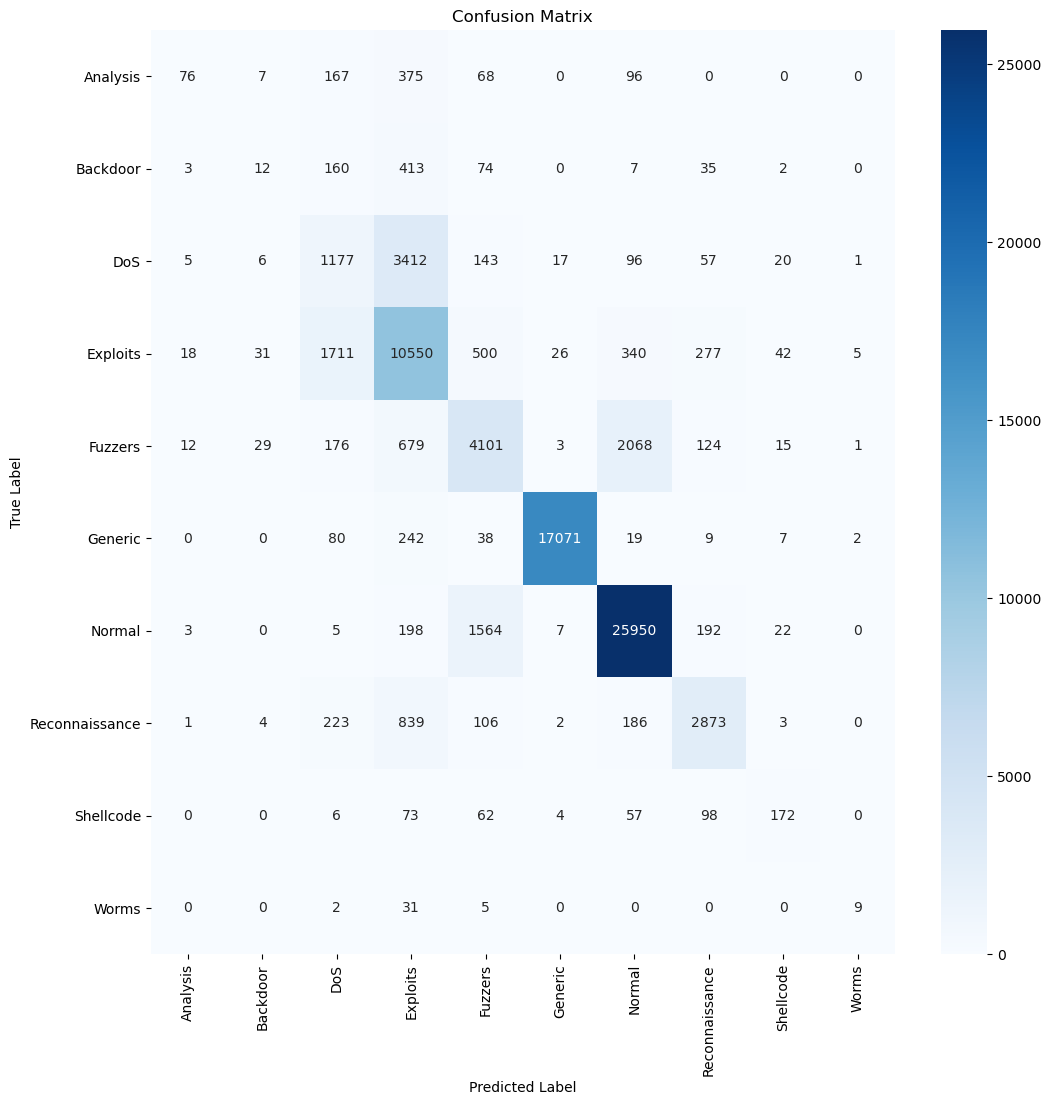

In [31]:
# Get unique class labels
class_labels = sorted(df['attack_cat'].unique())

# Create a confusion matrix plot
plt.figure(figsize=(12, 12))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels)
ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label")

# Show the plot
plt.show()

### Autoencoder Dimension Reduction with ADASYN

In [32]:
# Initialize the Random Forest classifier
rf_classifier1 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier1.fit(X_train_encoded_resampled, y_train_resampled)

# Make predictions on the test set
y_pred1 = rf_classifier1.predict(X_test_encoded_resampled)



In [33]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
classification_report21 = classification_report(y_test, y_pred1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report21)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8004061990634136

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.17      0.12      0.14       789
      Backdoor       0.09      0.07      0.07       706
           DoS       0.34      0.43      0.38      4934
      Exploits       0.68      0.67      0.68     13500
       Fuzzers       0.68      0.56      0.62      7208
       Generic       1.00      0.98      0.99     17468
        Normal       0.91      0.93      0.92     27941
Reconnaissance       0.82      0.70      0.76      4237
     Shellcode       0.35      0.71      0.47       472
         Worms       0.16      0.40      0.23        47

      accuracy                           0.80     77302
     macro avg       0.52      0.56      0.52     77302
  weighted avg       0.81      0.80      0.80     77302


Confusion Matrix:
 [[   98    62   254   249    40     0    86     0     0     0]
 [   76    46   262   255    40     0     4    16     6     1]
 [   92    75

### With PCA Dimension Reduction

In [46]:
X_train

dur     spkts     dpkts    sbytes    dbytes      rate  \
0       1.333334e-07  0.000094  0.000000  0.000012  0.000000  0.125000   
1       5.189851e-03  0.001221  0.000545  0.000620  0.000022  0.000061   
2       1.180215e-02  0.001033  0.000726  0.000291  0.000024  0.000027   
3       1.666667e-08  0.000094  0.000000  0.000012  0.000000  1.000000   
4       6.276919e-02  0.016628  0.003993  0.015133  0.000201  0.000059   
...              ...       ...       ...       ...       ...       ...   
180366  8.333335e-08  0.000094  0.000000  0.000006  0.000000  0.200000   
180367  7.415596e-02  0.002161  0.001997  0.000087  0.000111  0.000010   
180368  1.333334e-07  0.000094  0.000000  0.000006  0.000000  0.125000   
180369  6.666668e-08  0.000094  0.000000  0.000006  0.000000  0.250000   
180370  1.500000e-07  0.000094  0.000000  0.000006  0.000000  0.111111   

            sttl      dttl         sload     dload  ...  state_CLO  state_CON  \
0       0.996078  0.000000  1.670007e-02  0.000000  ...        0.0        0.0   
1       0.121569  0.114173  3.557206e-05  0.000306  ...        0.0        0.0   
2       0.996078  0.992126  7.263677e-06  0.000156  ...        0.0        0.0   
3       0.996078  0.000000  1.336005e-01  0.000000  ...        0.0        0.0   
4       0.243137  0.992126  7.663914e-05  0.000272  ...        0.0        0.0   
...          ...       ...           ...       ...  ...        ...        ...   
180366  0.996078  0.000000  1.523046e-02  0.000000  ...        0.0        0.0   
180367  0.243137  0.992126  3.660283e-07  0.000125  ...        0.0        0.0   
180368  0.996078  0.000000  9.519038e-03  0.000000  ...        0.0        0.0   
180369  0.996078  0.000000  1.903808e-02  0.000000  ...        0.0        0.0   
180370  0.996078  0.000000  8.461366e-03  0.000000  ...        0.0        0.0   

        state_ECO  state_FIN  state_INT  state_PAR  state_REQ  state_RST  \
0             0.0        0.0        1.0        0.0        0.0        0.0   
1             0.0        1.0        0.0        0.0        0.0        0.0   
2             0.0        1.0        0.0        0.0        0.0        0.0   
3             0.0        0.0        1.0        0.0        0.0        0.0   
4             0.0        1.0        0.0        0.0        0.0        0.0   
...           ...        ...        ...        ...        ...        ...   
180366        0.0        0.0        1.0        0.0        0.0        0.0   
180367        0.0        1.0        0.0        0.0        0.0        0.0   
180368        0.0        0.0        1.0        0.0        0.0        0.0   
180369        0.0        0.0        1.0        0.0        0.0        0.0   
180370        0.0        0.0        1.0        0.0        0.0        0.0   

        state_URN  state_no  
0             0.0       0.0  
1             0.0       0.0  
2             0.0       0.0  
3             0.0       0.0  
4             0.0       0.0  
...           ...       ...  
180366        0.0       0.0  
180367        0.0       0.0  
180368        0.0       0.0  
180369        0.0       0.0  
180370        0.0       0.0  

[180371 rows x 193 columns]

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier2.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred2 = rf_classifier2.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred2)
classification_report32 = classification_report(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report32)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.809629763783602

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.66      0.10      0.18       789
      Backdoor       0.15      0.02      0.04       706
           DoS       0.32      0.25      0.28      4934
      Exploits       0.63      0.79      0.70     13500
       Fuzzers       0.66      0.58      0.62      7208
       Generic       1.00      0.98      0.99     17468
        Normal       0.90      0.94      0.92     27941
Reconnaissance       0.82      0.70      0.76      4237
     Shellcode       0.56      0.36      0.44       472
         Worms       0.53      0.19      0.28        47

      accuracy                           0.81     77302
     macro avg       0.62      0.49      0.52     77302
  weighted avg       0.80      0.81      0.80     77302


Confusion Matrix:
 [[   81     7   170   366    68     0    97     0     0     0]
 [    3    14   159   411    78     0    17    19     5     0]
 [    5     7 

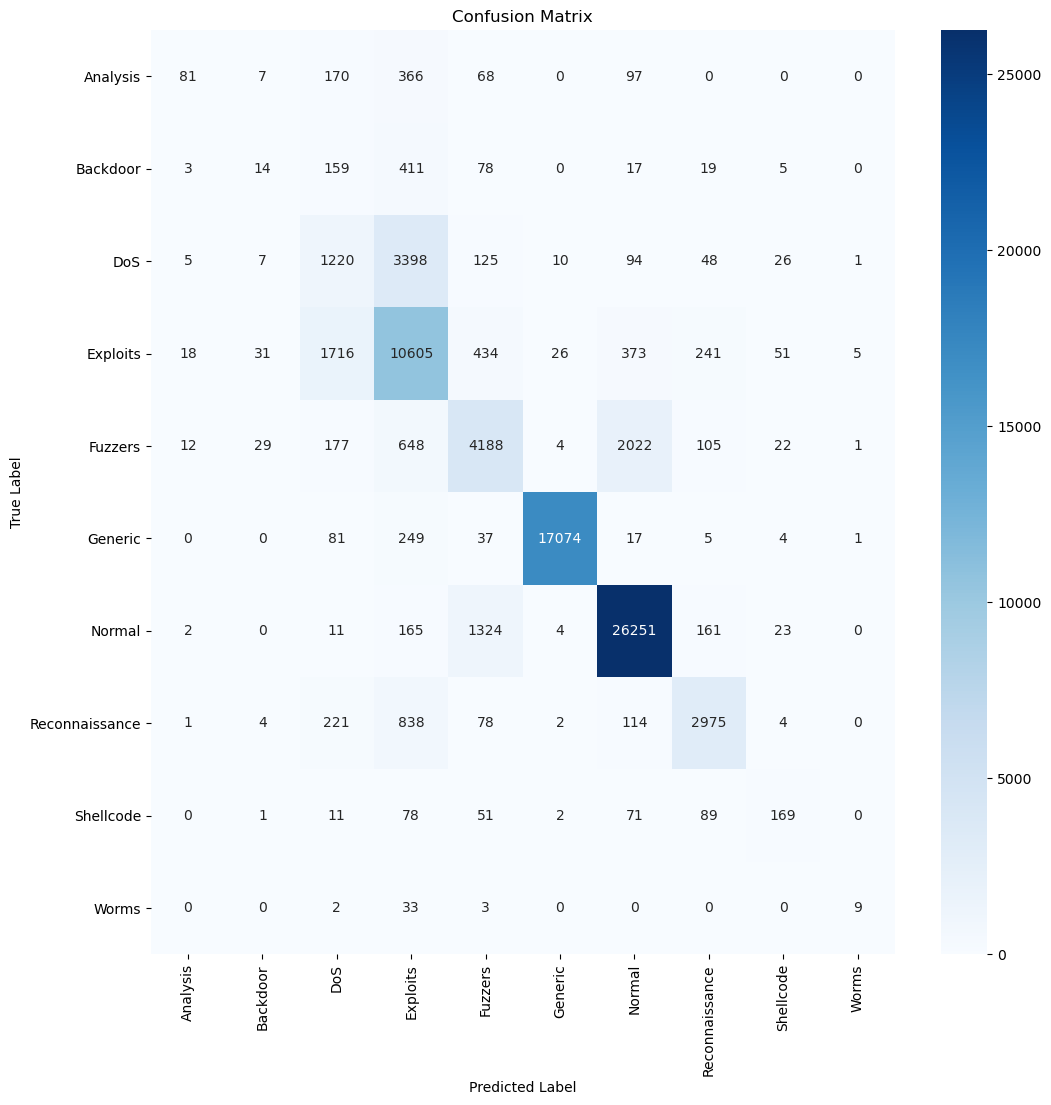

In [72]:
# Get unique class labels
class_labels = sorted(df['attack_cat'].unique())

# Create a confusion matrix plot
plt.figure(figsize=(12, 12))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels)
ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label")

# Show the plot
plt.show()

### PCA Dimension Reduction with ADASYN

In [75]:
# Initialize the Random Forest classifier
rf_classifier3 = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier3.fit(X_train_pca_resampled, y_train_resampled)

# Make predictions on the test set
y_pred3 = rf_classifier3.predict(X_test_pca_resampled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred3)
classification_report33 = classification_report(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report33)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8007037334092262

Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.17      0.13      0.14       789
      Backdoor       0.06      0.05      0.05       706
           DoS       0.34      0.44      0.39      4934
      Exploits       0.68      0.67      0.68     13500
       Fuzzers       0.69      0.56      0.62      7208
       Generic       1.00      0.98      0.99     17468
        Normal       0.91      0.93      0.92     27941
Reconnaissance       0.80      0.71      0.75      4237
     Shellcode       0.35      0.72      0.47       472
         Worms       0.17      0.47      0.25        47

      accuracy                           0.80     77302
     macro avg       0.52      0.57      0.53     77302
  weighted avg       0.81      0.80      0.80     77302


Confusion Matrix:
 [[  101    62   254   245    40     0    87     0     0     0]
 [   76    32   263   251    41     0    10    20    11     2]
 [   92    81

<a id='1_3_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>LSTM</b>

### With Autoencoder Dimension Reduction

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Assuming your data is already scaled and suitable for LSTM
# Reshape input data to be 3D [samples, timesteps, features]
#let's assume 1 timestep and all features as different time points
X_train_reshaped = X_train_encoded.reshape((X_train_encoded.shape[0], 1, X_train_encoded.shape[1]))
X_test_reshaped = X_test_encoded.reshape((X_test_encoded.shape[0], 1, X_test_encoded.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_encoded.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/100
 358/5637 [>.............................] - ETA: 26s - loss: 0.9421 - accuracy: 0.6659

KeyboardInterrupt: 

Text(0.5, 1.0, 'Accuracy over iterations')

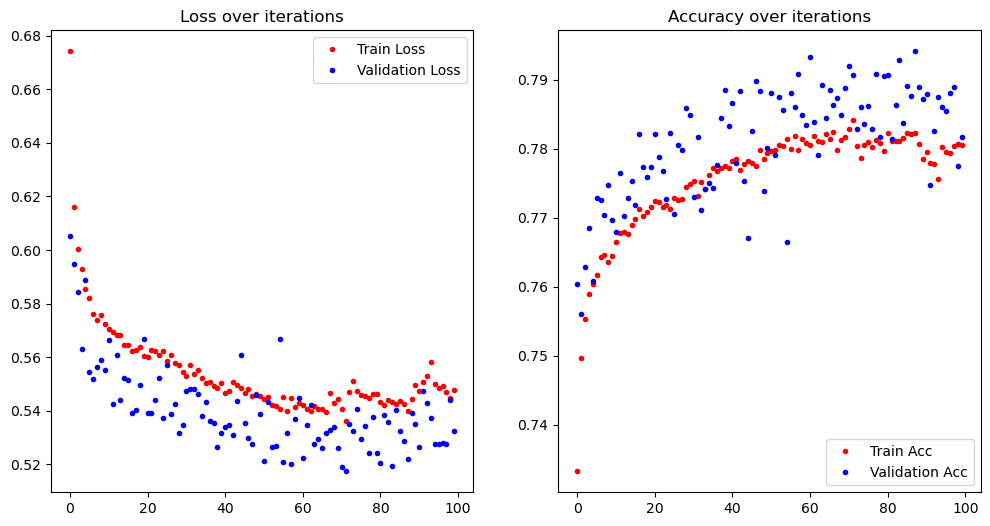

In [85]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

<a id='1_3_3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Autoencoder</b>

### Splitting Data for Autoencoder

In [23]:
from sklearn.model_selection import train_test_split

# Assuming df_scaled is your scaled feature set and df['attack_cat'] is the target
X = df_scaled
y = df['attack_cat']

# Align X and y to ensure they have the same indices
X_aligned = X.reset_index(drop=True)
y_aligned = y.reset_index(drop=True)

# Separate normal and anomalous data
normal_data = X_aligned[y_aligned == 'Normal']
anomalous_data = X_aligned[y_aligned != 'Normal']

# Option to reduce anomalous and normal data (currently using full dataset)
normal_data_reduced = normal_data.sample(frac=1, random_state=42)
anomalous_data_reduced = anomalous_data.sample(frac=1, random_state=42)

# Split the normal data into training and test sets
X_train_normal, X_test_normal = train_test_split(normal_data_reduced, test_size=0.3, random_state=42)

# Split the anomalous data into test set (no training data needed for anomalies)
_, X_test_anomalies = train_test_split(anomalous_data_reduced, test_size=0.3, random_state=42)

# The variables X_train_normal, X_test_normal, and X_test_anomalies are now ready for use

### Model

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define the autoencoder architecture
input_dim = X_train_normal.shape[1]
encoding_dim = 32  # This is a hyperparameter and can be tuned

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_normal, X_train_normal,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_normal, X_test_normal))

Epoch 1/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0578 - val_loss: 0.0083
Epoch 2/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 3/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 4/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 5/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/25
255/255 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/25
255/255 [==============================] - 1s 3ms/step - loss: 9.6399e-04 - val_loss: 8.3999e-04
Epoch 9/25
255/255 [==============================] - 1s 3ms/step - loss: 7.3511e-04 - val_loss: 6.3350e-04
Epoch 10/25
255/255 [==============================] - 1s 3ms/step - loss: 5.5473e-0

In [46]:
# Function to calculate reconstruction error
def calculate_reconstruction_error(data):
    predictions = autoencoder.predict(data)
    reconstruction_error = np.mean(np.power(data - predictions, 2), axis=1)
    return reconstruction_error

# Calculate reconstruction error for both normal and anomalous test data
error_normal = calculate_reconstruction_error(X_test_normal)
error_anomalies = calculate_reconstruction_error(X_test_anomalies)

1544/1544 [==============================] - 1s 794us/step


In [48]:
# Determine a threshold for anomaly detection
threshold = np.percentile(error_normal, 77.3)  # Optimal is between 70 and 85

# Classify as anomalies or normal based on the threshold
is_anomaly_normal = error_normal > threshold
is_anomaly_anomalous = error_anomalies > threshold

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Assuming true labels are 0 for normal and 1 for anomalies
y_true = np.concatenate([np.zeros(len(X_test_normal)), np.ones(len(X_test_anomalies))])
y_pred = np.concatenate([is_anomaly_normal.astype(int), is_anomaly_anomalous.astype(int)])

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_true, y_pred))

Accuracy: 0.7931618845566738
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73     27900
         1.0       0.86      0.80      0.83     49402

    accuracy                           0.79     77302
   macro avg       0.78      0.79      0.78     77302
weighted avg       0.80      0.79      0.80     77302



<a id='1_3_4'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Learning K Means</b>

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_scaled is your scaled feature set

# Initialize K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters based on domain knowledge or experimentation
kmeans.fit(df_scaled)

# Calculate distances to the nearest cluster center
distances = np.min(cdist(df_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(distances, 37)  # This can be tuned

# Detect anomalies (points with distances above the threshold)
anomalies_kmeans = distances > threshold

# True labels (0 for 'Benign' and 1 for others)
true_labels = df['attack_cat'].apply(lambda x: 0 if x == 'Normal' else 1).values

# Calculate accuracy
accuracy_kmeans = accuracy_score(true_labels, anomalies_kmeans)
print("Accuracy:", accuracy_kmeans)

# Print the classification report for precision, recall, and F1-score
print(classification_report(true_labels, anomalies_kmeans))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, anomalies_kmeans))

C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.4717762435334707
              precision    recall  f1-score   support

           0       0.27      0.28      0.28     93000
           1       0.59      0.58      0.58    164673

    accuracy                           0.47    257673
   macro avg       0.43      0.43      0.43    257673
weighted avg       0.47      0.47      0.47    257673

Confusion Matrix:
[[26115 66885]
 [69224 95449]]


<a id='2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:100%"> <b>USB-IDS-1 Dataset</b>

<a id='2_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Import and EDA</b>

In [3]:
#Import the provided training and test data contaning 4 million records in total
df1_train = pd.read_csv("./datasets/USB-IDS-1-TRAIN.csv")
df1_test = pd.read_csv("./datasets/USB-IDS-1-TEST.csv")
#Concatenate them so we can do our own ratio and sampling, as well as not do preprocessing twice.
df1 = pd.concat([df1_train, df1_test])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091395 entries, 0 to 722026
Data columns (total 84 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    int64  
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    int64  
 6   Timestamp                   object 
 7   Flow Duration               int64  
 8   Total Fwd Packet            int64  
 9   Total Bwd packets           int64  
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Packet Length Std      

In [4]:
df1.head(10)

Flow ID          Src IP  Src Port  \
0  192.168.111.65-192.168.111.66-56924-80-6  192.168.111.65     56924   
1  192.168.111.65-192.168.111.66-37024-80-6  192.168.111.65     37024   
2  192.168.111.65-192.168.111.66-53004-80-6  192.168.111.65     53004   
3         *.*.*.*-192.168.111.66-64442-80-6         *.*.*.*     64442   
4  192.168.111.65-192.168.111.66-49406-80-6  192.168.111.65     49406   
5  192.168.111.65-192.168.111.66-48736-80-6  192.168.111.65     48736   
6  192.168.111.65-192.168.111.66-60954-80-6  192.168.111.65     60954   
7  192.168.111.65-192.168.111.66-58542-80-6  192.168.111.65     58542   
8         *.*.*.*-192.168.111.66-55325-80-6         *.*.*.*     55325   
9  192.168.111.65-192.168.111.66-37909-80-6  192.168.111.65     37909   

           Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  192.168.111.66        80         6  11/02/2021 11:16:52 AM          11264   
1  192.168.111.66        80         6  11/02/2021 09:04:39 AM         160427   
2  192.168.111.66        80         6  11/02/2021 09:06:09 AM         138656   
3  192.168.111.66        80         6  07/06/2021 12:43:34 AM       30536093   
4  192.168.111.66        80         6  11/02/2021 09:05:02 AM          25545   
5  192.168.111.66        80         6  09/09/2021 05:10:41 PM         311609   
6  192.168.111.66        80         6  11/02/2021 10:00:30 AM          66333   
7  192.168.111.66        80         6  11/02/2021 11:04:45 AM         565423   
8  192.168.111.66        80         6  06/06/2021 10:15:16 PM       15235818   
9  192.168.111.66        80         6  11/02/2021 10:14:26 AM          19347   

   Total Fwd Packet  Total Bwd packets  ...  Fwd Seg Size Min  Active Mean  \
0                 6                  4  ...                32          0.0   
1                 8                  6  ...                32          0.0   
2                 7                  5  ...                32          0.0   
3                37                 28  ...                32    5499861.0   
4                 7                  6  ...                32          0.0   
5                 7                  5  ...                32          0.0   
6                 8                  6  ...                32          0.0   
7                 6                  5  ...                32          0.0   
8                20                 16  ...                32    5267626.0   
9                21                 19  ...                32          0.0   

   Active Std  Active Max  Active Min   Idle Mean  Idle Std    Idle Max  \
0         0.0         0.0         0.0         0.0       0.0         0.0   
1         0.0         0.0         0.0         0.0       0.0         0.0   
2         0.0         0.0         0.0         0.0       0.0         0.0   
3         0.0   5499861.0   5499861.0  25036202.0       0.0  25036202.0   
4         0.0         0.0         0.0         0.0       0.0         0.0   
5         0.0         0.0         0.0         0.0       0.0         0.0   
6         0.0         0.0         0.0         0.0       0.0         0.0   
7         0.0         0.0         0.0         0.0       0.0         0.0   
8         0.0   5267626.0   5267626.0   9968145.0       0.0   9968145.0   
9         0.0         0.0         0.0         0.0       0.0         0.0   

     Idle Min                Label  
0         0.0     TCPFlood-Evasive  
1         0.0       Hulk-NoDefense  
2         0.0       Hulk-NoDefense  
3  25036202.0               BENIGN  
4         0.0       Hulk-NoDefense  
5         0.0       Hulk-Security2  
6         0.0      Hulk-Reqtimeout  
7         0.0         Hulk-Evasive  
8   9968145.0               BENIGN  
9         0.0  TCPFlood-Reqtimeout  

[10 rows x 84 columns]

C:\Users\LEGION\AppData\Local\Temp\ipykernel_23960\112048245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')


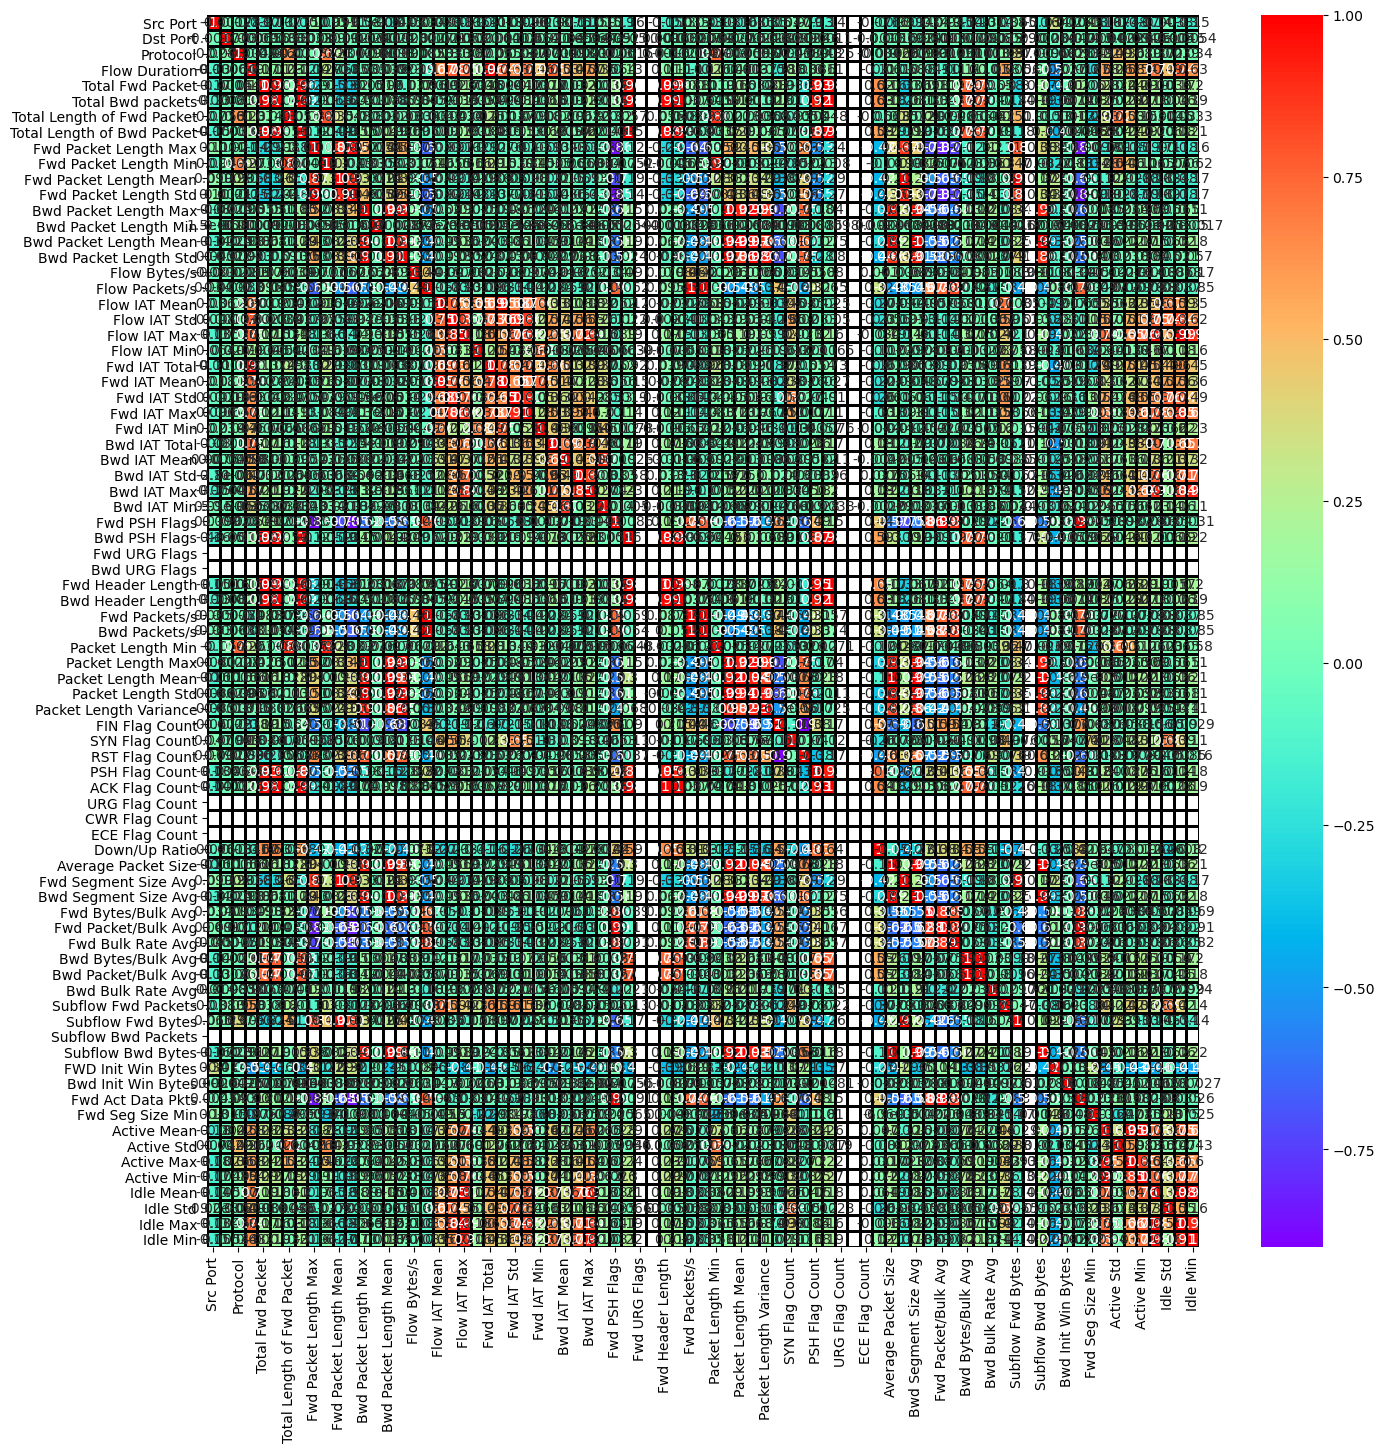

In [5]:
plt.figure(figsize=(16,16))
sns.heatmap(df1.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')
plt.show()

In [28]:
# Calculating the correlation matrix
corr_matrix = df1.corr()

# Creating a DataFrame from the correlation matrix
corr_pairs = corr_matrix.unstack()

# Removing self-correlations (where two features are the same)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sorting the pairs by absolute correlation values in descending order
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Getting unique pairs to avoid duplicates
unique_sorted_corr_pairs = sorted_corr_pairs.drop_duplicates()

# Displaying the top correlated pairs
unique_sorted_corr_pairs.head(20)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22884\19316745.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


Fwd Segment Size Avg        Fwd Packet Length Mean        1.000000
Bwd Header Length           Total Bwd packets             1.000000
Bwd Packet Length Max       Packet Length Max             0.999984
Average Packet Size         Subflow Bwd Bytes             0.999661
Subflow Bwd Bytes           Packet Length Mean            0.999661
Fwd Packets/s               Flow Packets/s                0.999322
Flow Packets/s              Bwd Packets/s                 0.999154
ACK Flag Count              Bwd Header Length             0.998682
                            Total Bwd packets             0.998681
Total Length of Bwd Packet  Bwd PSH Flags                 0.998439
Bwd Packet/Bulk Avg         Bwd Bytes/Bulk Avg            0.997148
Fwd Packets/s               Bwd Packets/s                 0.996962
Fwd Header Length           ACK Flag Count                0.996504
Flow IAT Max                Idle Max                      0.992845
Bwd Header Length           Fwd Header Length             0.99

In [33]:
first_10_rows1 = df1.iloc[:10, :].loc[:, ["Fwd Segment Size Avg", "Fwd Packet Length Mean"]]
first_10_rows2 = df1.iloc[:10, :].loc[:, ["Bwd Header Length", "Total Bwd packets"]]

# Display the result
print(first_10_rows1)
print(first_10_rows2)

   Fwd Segment Size Avg  Fwd Packet Length Mean
0              5.333333                5.333333
1             39.750000               39.750000
2             45.857143               45.857143
3             14.513514               14.513514
4             53.142857               53.142857
5             53.428571               53.428571
6             39.125000               39.125000
7             60.500000               60.500000
8             15.450000               15.450000
9             16.000000               16.000000
   Bwd Header Length  Total Bwd packets
0                136                  4
1                200                  6
2                168                  5
3                904                 28
4                200                  6
5                168                  5
6                200                  6
7                168                  5
8                520                 16
9                616                 19


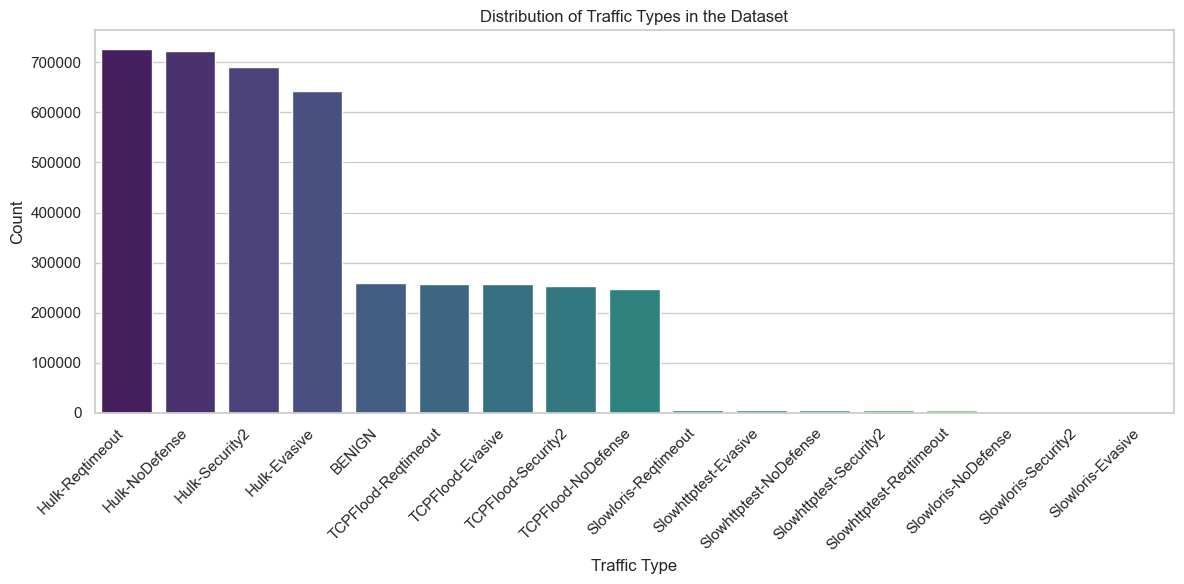

In [22]:
# Setting plot style
sns.set(style="whitegrid")

# Counting the occurrences of each label
label_counts = df1['Label'].value_counts()

# Creating a bar plot for traffic type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.title('Distribution of Traffic Types in the Dataset')
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
# Check if all values in each column are zero
all_zero_columns = (df1 == 0).all()

# Display the result
print(all_zero_columns[all_zero_columns])

Fwd URG Flags          True
Bwd URG Flags          True
URG Flag Count         True
CWR Flag Count         True
ECE Flag Count         True
Subflow Bwd Packets    True
dtype: bool


### Notes on dataset
There seems to be alot of problems with the dataset, the main one being the imbalanced labels.<br>
2 columns are exactly the same (Fwd Segment Size Avg    and    Fwd Packet Length Mean), and alot of columns have very high correlation which is redundant. <br>
Some columns have bad variety, feature column Fwd Packet Length Min for example only has around 4000 records out of the 4 million that are non zero. <br>
Some columns are completely useless like the ID columns. Flow ID, Src IP, Dst IP, Timestamp:
These are typically unique identifiers for each flow, source, destination, and time. They might not be directly useful for pattern recognition, as they are often unique to each record. <br>
6 Columns only have 0 values and will also need to be removed


<a id='2_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Pre-processing and feature selection</b>

### Drop all the zero information columns
Flow ID
Src IP
Dst IP
Timestamp
Fwd URG Flags
Bwd URG Flags
URG Flag Count
CWR Flag Count
ECE Flag Count
Subflow Bwd Packets
<br>
Drop **Fwd Packet Length Mean** Since its exactly the same as another column

In [5]:
# List of columns to be dropped
columns_to_drop = ["Flow ID", "Src IP", "Dst IP", "Timestamp", "Fwd URG Flags", 
                   "Bwd URG Flags", "URG Flag Count", "CWR Flag Count", 
                   "ECE Flag Count", "Subflow Bwd Packets", "Fwd Packet Length Mean"]

# Drop the columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)

# Now df has the specified columns removed
df1.head(5)

Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0     56924        80         6          11264                 6   
1     37024        80         6         160427                 8   
2     53004        80         6         138656                 7   
3     64442        80         6       30536093                37   
4     49406        80         6          25545                 7   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                  4                        32.0                       498.0   
1                  6                       318.0                     11192.0   
2                  5                       321.0                     11192.0   
3                 28                       537.0                    111971.0   
4                  6                       372.0                     11192.0   

   Fwd Packet Length Max  Fwd Packet Length Min  ...  Fwd Seg Size Min  \
0                   16.0                    0.0  ...                32   
1                  318.0                    0.0  ...                32   
2                  321.0                    0.0  ...                32   
3                   78.0                    0.0  ...                32   
4                  372.0                    0.0  ...                32   

   Active Mean  Active Std  Active Max  Active Min   Idle Mean  Idle Std  \
0          0.0         0.0         0.0         0.0         0.0       0.0   
1          0.0         0.0         0.0         0.0         0.0       0.0   
2          0.0         0.0         0.0         0.0         0.0       0.0   
3    5499861.0         0.0   5499861.0   5499861.0  25036202.0       0.0   
4          0.0         0.0         0.0         0.0         0.0       0.0   

     Idle Max    Idle Min             Label  
0         0.0         0.0  TCPFlood-Evasive  
1         0.0         0.0    Hulk-NoDefense  
2         0.0         0.0    Hulk-NoDefense  
3  25036202.0  25036202.0            BENIGN  
4         0.0         0.0    Hulk-NoDefense  

[5 rows x 73 columns]

Drop the label colomn for preprocessing

In [6]:
df1_work = df1.drop(columns="Label")
df1_work.head()

Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0     56924        80         6          11264                 6   
1     37024        80         6         160427                 8   
2     53004        80         6         138656                 7   
3     64442        80         6       30536093                37   
4     49406        80         6          25545                 7   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                  4                        32.0                       498.0   
1                  6                       318.0                     11192.0   
2                  5                       321.0                     11192.0   
3                 28                       537.0                    111971.0   
4                  6                       372.0                     11192.0   

   Fwd Packet Length Max  Fwd Packet Length Min  ...  Fwd Act Data Pkts  \
0                   16.0                    0.0  ...                  2   
1                  318.0                    0.0  ...                  1   
2                  321.0                    0.0  ...                  1   
3                   78.0                    0.0  ...                  7   
4                  372.0                    0.0  ...                  1   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0                32          0.0         0.0         0.0         0.0   
1                32          0.0         0.0         0.0         0.0   
2                32          0.0         0.0         0.0         0.0   
3                32    5499861.0         0.0   5499861.0   5499861.0   
4                32          0.0         0.0         0.0         0.0   

    Idle Mean  Idle Std    Idle Max    Idle Min  
0         0.0       0.0         0.0         0.0  
1         0.0       0.0         0.0         0.0  
2         0.0       0.0         0.0         0.0  
3  25036202.0       0.0  25036202.0  25036202.0  
4         0.0       0.0         0.0         0.0  

[5 rows x 72 columns]

No need for encoding, as all features are numerical.

### Scaling and Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df1_scaled = pd.DataFrame(scaler.fit_transform(df1_work), columns=df1_work.columns)
df1_scaled.head(5)

Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0  0.868605   0.00134  0.352941       0.000094          0.002373   
1  0.564950   0.00134  0.352941       0.001337          0.003322   
2  0.808789   0.00134  0.352941       0.001155          0.002848   
3  0.983322   0.00134  0.352941       0.254467          0.017086   
4  0.753887   0.00134  0.352941       0.000213          0.002848   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0           0.001055                    0.000303                    0.000051   
1           0.001582                    0.003012                    0.001136   
2           0.001318                    0.003040                    0.001136   
3           0.007382                    0.005086                    0.011370   
4           0.001582                    0.003523                    0.001136   

   Fwd Packet Length Max  Fwd Packet Length Min  ...  Fwd Act Data Pkts  \
0               0.011088                    0.0  ...           0.006803   
1               0.220374                    0.0  ...           0.003401   
2               0.222453                    0.0  ...           0.003401   
3               0.054054                    0.0  ...           0.023810   
4               0.257796                    0.0  ...           0.003401   

   Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
0               0.8     0.000000         0.0    0.000000    0.000000   
1               0.8     0.000000         0.0    0.000000    0.000000   
2               0.8     0.000000         0.0    0.000000    0.000000   
3               0.8     0.048979         0.0    0.048979    0.048979   
4               0.8     0.000000         0.0    0.000000    0.000000   

   Idle Mean  Idle Std  Idle Max  Idle Min  
0   0.000000       0.0  0.000000  0.000000  
1   0.000000       0.0  0.000000  0.000000  
2   0.000000       0.0  0.000000  0.000000  
3   0.209055       0.0  0.209055  0.209055  
4   0.000000       0.0  0.000000  0.000000  

[5 rows x 72 columns]

### Train and Test Split

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df1_scaled is your feature set and df1['Label'] is the target
X = df1_scaled.reset_index(drop=True)
y = df1['Label'].reset_index(drop=True)

# Identify minority classes
minority_classes = y.value_counts().index[y.value_counts() < 100000]  # Set your threshold

# Separate majority and minority classes
X_minority = X.loc[y.isin(minority_classes)]
y_minority = y[y.isin(minority_classes)]

X_majority = X.loc[~y.isin(minority_classes)]
y_majority = y[~y.isin(minority_classes)]

# Undersample majority class
X_majority_sampled, _, y_majority_sampled, _ = train_test_split(X_majority, y_majority, 
                                                               train_size=500000,  # Set your desired size
                                                               random_state=42, stratify=y_majority)

# Combine datasets
X_combined = pd.concat([X_minority, X_majority_sampled])
y_combined = pd.concat([y_minority, y_majority_sampled])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

<a id='2_3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Modelling and Evaluation</b>

<a id='1_3_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Random Forest</b>

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.6359423339470684

Classification Report:
                          precision    recall  f1-score   support

                 BENIGN       1.00      1.00      1.00      9488
           Hulk-Evasive       1.00      1.00      1.00     23871
         Hulk-NoDefense       0.50      0.47      0.48     26974
        Hulk-Reqtimeout       0.50      0.47      0.48     26723
         Hulk-Security2       0.88      0.98      0.93     25665
   Slowhttptest-Evasive       0.90      0.95      0.93      1672
 Slowhttptest-NoDefense       0.69      0.69      0.69      1727
Slowhttptest-Reqtimeout       0.99      0.93      0.96      1473
 Slowhttptest-Security2       0.73      0.72      0.72      1716
      Slowloris-Evasive       1.00      1.00      1.00       431
    Slowloris-NoDefense       1.00      1.00      1.00       426
   Slowloris-Reqtimeout       1.00      1.00      1.00      1657
    Slowloris-Security2       1.00      1.00      1.00       471
       TCPFlood-Evasive       0.26 

<a id='2_3_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>LSTM</b>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert DataFrame to NumPy array
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Design the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_reshaped.shape[2]), recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train_encoded, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test_encoded), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/100
5822/5822 [==============================] - 18s 3ms/step - loss: 0.8525 - accuracy: 0.5501 - val_loss: 0.7934 - val_accuracy: 0.5674
Epoch 2/100
5822/5822 [==============================] - 16s 3ms/step - loss: 0.7895 - accuracy: 0.5706 - val_loss: 0.7656 - val_accuracy: 0.5798
Epoch 3/100
5822/5822 [==============================] - 16s 3ms/step - loss: 0.7755 - accuracy: 0.5787 - val_loss: 0.7735 - val_accuracy: 0.5750
Epoch 4/100
5822/5822 [==============================] - 16s 3ms/step - loss: 0.7675 - accuracy: 0.5810 - val_loss: 0.7667 - val_accuracy: 0.5824
Epoch 5/100
5822/5822 [==============================] - 16s 3ms/step - loss: 0.7630 - accuracy: 0.5839 - val_loss: 0.7658 - val_accuracy: 0.5797
Epoch 6/100
5822/5822 [==============================] - 15s 3ms/step - loss: 0.7556 - accuracy: 0.5882 - val_loss: 0.7651 - val_accuracy: 0.5812
Epoch 7/100
5822/5822 [==============================] - 16s 3ms/step - loss: 0.7516 - accuracy: 0.5895 - val_loss: 0.7760 -

Text(0.5, 1.0, 'Accuracy over iterations')

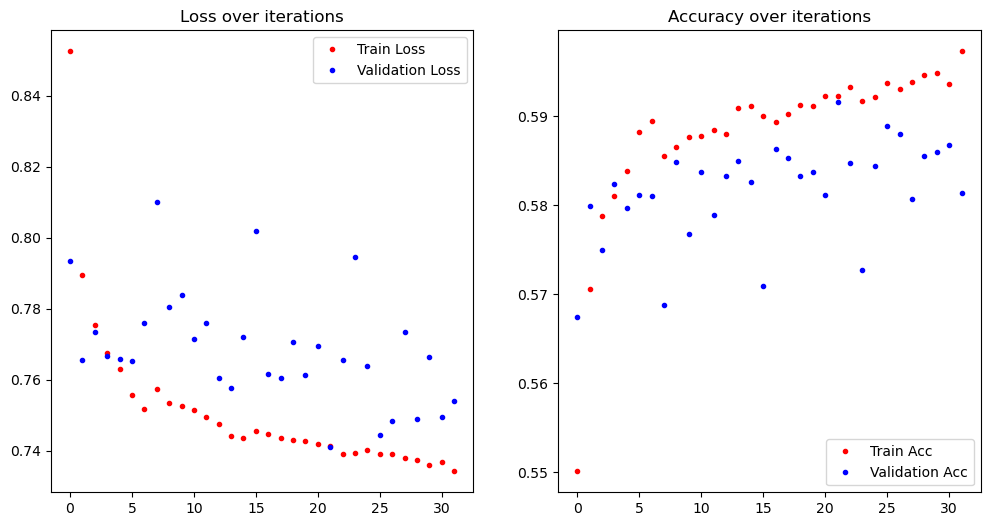

In [12]:
n = len(history.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (history.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (history.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

<a id='2_3_3'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Learning Autoencoder</b>

### Test Split for Unsupervised learning

In [13]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in list(
                          locals().items())), key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))



                           df1:  2.5 GiB
                    df1_scaled:  2.2 GiB
                             _:  1.5 GiB
                      df1_test: 702.6 MiB
              X_test_anomalies: 640.3 MiB
                X_train_normal: 101.0 MiB
                 X_test_normal: 43.3 MiB
                            _4: 10.0 KiB
                            _5:  3.2 KiB
                            __:  3.0 KiB


In [9]:
import gc
del df1_train
del df1_work
gc.collect()

22

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df1_scaled
y = df1['Label']

# Align X and y to ensure they have the same indices
X_aligned = X.reset_index(drop=True)
y_aligned = y.reset_index(drop=True)


# Separate normal and anomalous data
normal_data = X_aligned[y_aligned == 'BENIGN']
anomalous_data = X_aligned[y_aligned != 'BENIGN']

# Option to reduce anomalous and normal data (currently using full dataset)
normal_data_reduced = normal_data.sample(frac=1, random_state=42)
anomalous_data_reduced = anomalous_data.sample(frac=1, random_state=42)

# Delete the original datasets to free up memory
del normal_data, anomalous_data

# Split the normal data into training and test sets
X_train_normal, X_test_normal = train_test_split(normal_data_reduced, test_size=0.3, random_state=42)

# Split the anomalous data into test set (no training data needed for anomalies)
_, X_test_anomalies = train_test_split(anomalous_data_reduced, test_size=0.3, random_state=42)

# The variables X_train_normal, X_test_normal, and X_test_anomalies are now ready for use
del normal_data_reduced, anomalous_data_reduced, X, y, X_aligned, y_aligned


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Define the autoencoder architecture
input_dim = X_train_normal.shape[1]
encoding_dim = 32  # This is a hyperparameter and can be tuned

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train_normal, X_train_normal,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_normal, X_test_normal))

Epoch 1/50
709/709 [==============================] - 3s 3ms/step - loss: 0.0151 - val_loss: 0.0015
Epoch 2/50
709/709 [==============================] - 2s 2ms/step - loss: 8.0664e-04 - val_loss: 5.4242e-04
Epoch 3/50
709/709 [==============================] - 2s 2ms/step - loss: 4.2664e-04 - val_loss: 3.5461e-04
Epoch 4/50
709/709 [==============================] - 2s 3ms/step - loss: 3.0447e-04 - val_loss: 2.7234e-04
Epoch 5/50
709/709 [==============================] - 2s 2ms/step - loss: 2.4442e-04 - val_loss: 2.3022e-04
Epoch 6/50
709/709 [==============================] - 2s 2ms/step - loss: 2.1197e-04 - val_loss: 2.0532e-04
Epoch 7/50
709/709 [==============================] - 2s 3ms/step - loss: 1.9022e-04 - val_loss: 1.8466e-04
Epoch 8/50
709/709 [==============================] - 2s 2ms/step - loss: 1.7130e-04 - val_loss: 1.6814e-04
Epoch 9/50
709/709 [==============================] - 2s 2ms/step - loss: 1.5277e-04 - val_loss: 1.4434e-04
Epoch 10/50
709/709 [===============

In [15]:
# Function to calculate reconstruction error
def calculate_reconstruction_error(data):
    predictions = autoencoder.predict(data)
    reconstruction_error = np.mean(np.power(data - predictions, 2), axis=1)
    return reconstruction_error

# Calculate reconstruction error for both normal and anomalous test data
error_normal = calculate_reconstruction_error(X_test_normal)
error_anomalies = calculate_reconstruction_error(X_test_anomalies)

35929/35929 [==============================] - 31s 876us/step


In [43]:
# Determine a threshold for anomaly detection
threshold = np.percentile(error_normal, 99.69)  # Optimal is between 98 and 99

# Classify as anomalies or normal based on the threshold
is_anomaly_normal = error_normal > threshold
is_anomaly_anomalous = error_anomalies > threshold

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Assuming true labels are 0 for normal and 1 for anomalies
y_true = np.concatenate([np.zeros(len(X_test_normal)), np.ones(len(X_test_anomalies))])
y_pred = np.concatenate([is_anomaly_normal.astype(int), is_anomaly_anomalous.astype(int)])

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_true, y_pred))

Accuracy: 0.9998003941604293
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77706
         1.0       1.00      1.00      1.00   1149713

    accuracy                           1.00   1227419
   macro avg       1.00      1.00      1.00   1227419
weighted avg       1.00      1.00      1.00   1227419



<a id='2_3_4'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:70%"> <b>Unsupervised Learning K Means</b>

In [50]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df_scaled is your scaled feature set

# Initialize K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters based on domain knowledge or experimentation
kmeans.fit(df1_scaled)

# Calculate distances to the nearest cluster center
distances = np.min(cdist(df1_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)

# Determine the threshold for anomalies
threshold = np.percentile(distances, 80)  # This can be tuned

# Detect anomalies (points with distances above the threshold)
anomalies_kmeans = distances > threshold

# True labels (0 for 'Benign' and 1 for others)
true_labels = df1['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1).values

# Calculate accuracy
accuracy_kmeans = accuracy_score(true_labels, anomalies_kmeans)
print("Accuracy:", accuracy_kmeans)

# Print the classification report for precision, recall, and F1-score
print(classification_report(true_labels, anomalies_kmeans))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_labels, anomalies_kmeans))

C:\Users\LEGION\anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy: 0.1366917640560249
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    259019
           1       0.68      0.15      0.24   3832376

    accuracy                           0.14   4091395
   macro avg       0.34      0.07      0.12   4091395
weighted avg       0.64      0.14      0.23   4091395

Confusion Matrix:
[[      0  259019]
 [3273116  559260]]
